In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data=pd.read_csv("Vehical_data.csv")
print("Data loaded successfully!!")

Data loaded successfully!!


In [3]:
print("First five rows of data:")
print(data.head(5))

First five rows of data:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [4]:
print("Last five rows of data:")
print(data.tail(5))

Last five rows of data:
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Seller_Type Transmission  Owner  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  


In [5]:
print("Information of the data:")
data.info()

Information of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
print("Columns used in data are:")
print((data.columns).to_list())

Columns used in data are:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [14]:
print("Null data:")
data.isnull().sum()

Null data:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
print("Description of data:")
data.describe()

Description of data:


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
print("Count of fuel types:")
print(data['Fuel_Type'].value_counts())
print("\nCount of seller type:")
print(data['Seller_Type'].value_counts())
print("\n Count of Transmission:")

print(data['Transmission'].value_counts())

Count of fuel types:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Count of seller type:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

 Count of Transmission:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [22]:
print("Shape of data:",data.shape)

Shape of data: (301, 9)


In [23]:
fuel_type = data['Fuel_Type']
seller_type = data['Seller_Type']
transmission_type = data['Transmission']
selling_price = data['Selling_Price']

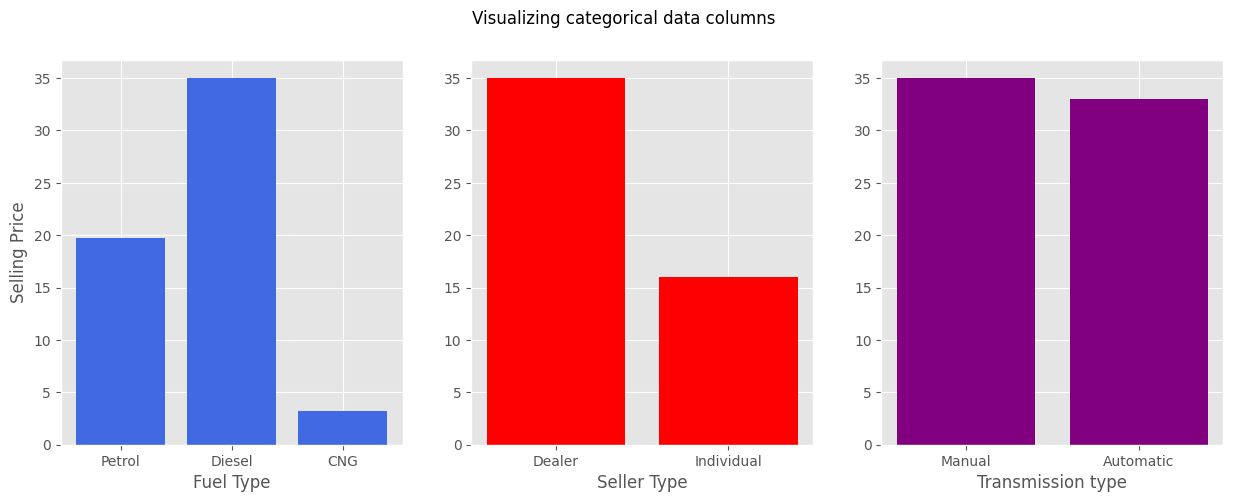

In [24]:
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

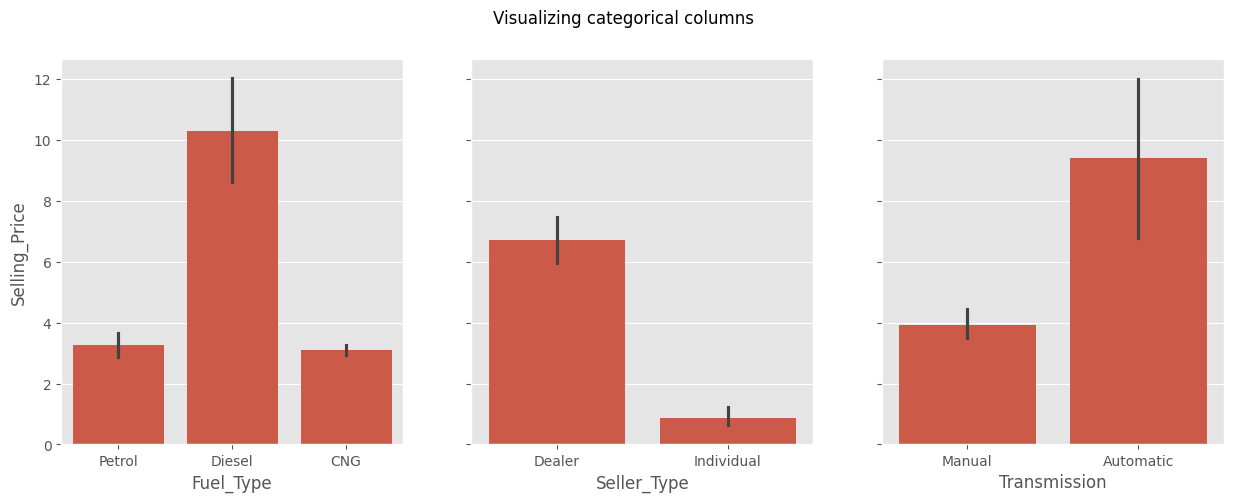

In [25]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

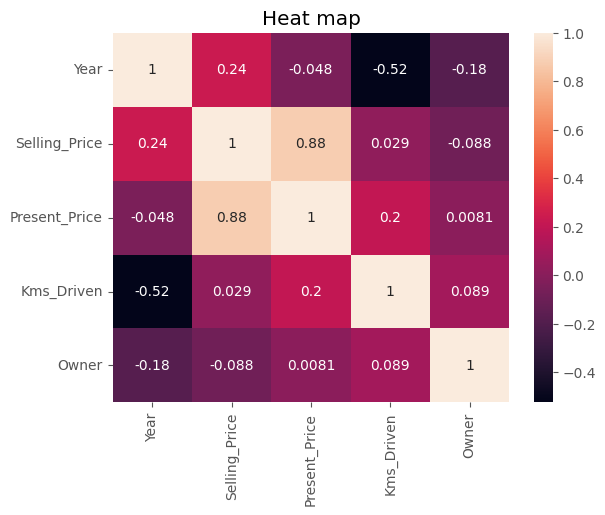

In [28]:
sns.heatmap(data=data.corr(numeric_only=True),annot=True,cmap=None)
plt.title("Heat map")
plt.show()

In [29]:
petrol_data = data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [30]:
seller_data = data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [31]:
data['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [40]:
data.rename(columns={'Car_Name':'Vehical_Name'},inplace=True)

In [42]:
vechical_name_avg_price=data.groupby('Vehical_Name')["Selling_Price"].mean()

In [43]:
df=pd.DataFrame(vechical_name_avg_price)
df.to_csv("vechical_name_avg_price.csv",index=True)

In [46]:
data["Vehical_Avg_Price"]=data["Vehical_Name"].map(vechical_name_avg_price)

In [49]:
data.drop("Vehical_Name",inplace=True,axis=1)

In [50]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehical_Avg_Price
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.862500
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,3.158333
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7.472222
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2.512500
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4.540000
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7.419231
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,4.745000
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.419231
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,7.419231


In [51]:
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

C:\Users\suman\AppData\Local\Temp\ipykernel_22428\2408079492.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)


In [52]:
data = pd.get_dummies(data, columns=['Seller_Type', 'Transmission'], drop_first=True)

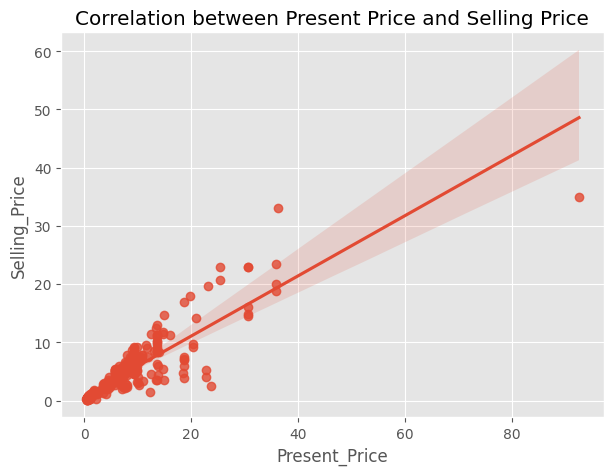

In [53]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Correlation between Present Price and Selling Price')
plt.show()

In [54]:
X = data.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [58]:
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
r2 = metrics.r2_score(y_test, pred)

In [59]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 1.14
MSE: 3.15
R2 Score: 0.89


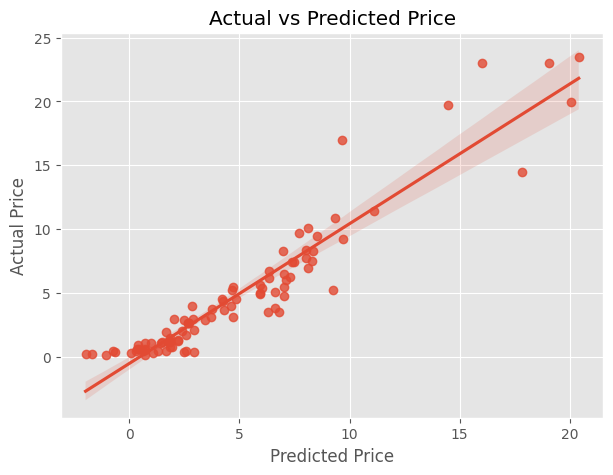

In [60]:
# Actual vs Predicted Plot
plt.figure(figsize=(7, 5))
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [62]:
# Save the model and scaler
import joblib

# Save the trained model and scaler for deployment
joblib.dump(model, 'vehical_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Successfully dumped the model!")

Successfully dumped the model!
